# Машинное обучение, МАЕ РЭШ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 01.12.2022

Дедлайн: 23:59MSK 09.12.2022


### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina'
np.set_printoptions(suppress=True)

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

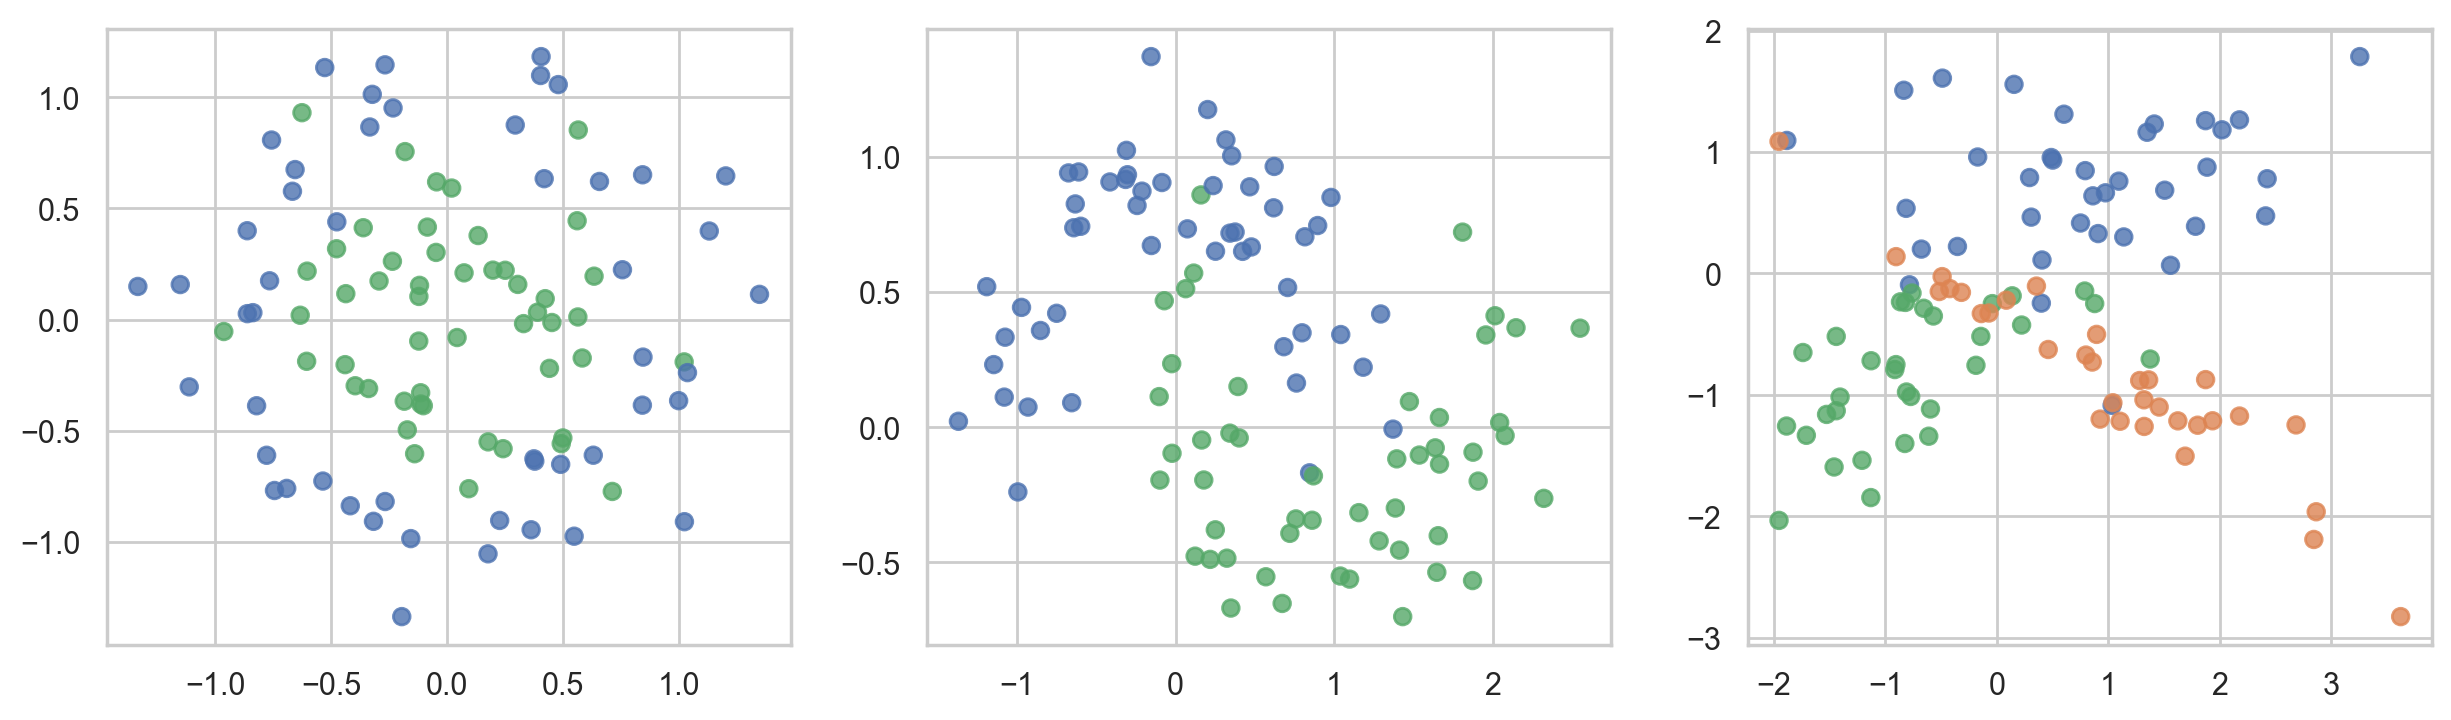

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1.5 балла)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y, axis=None):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

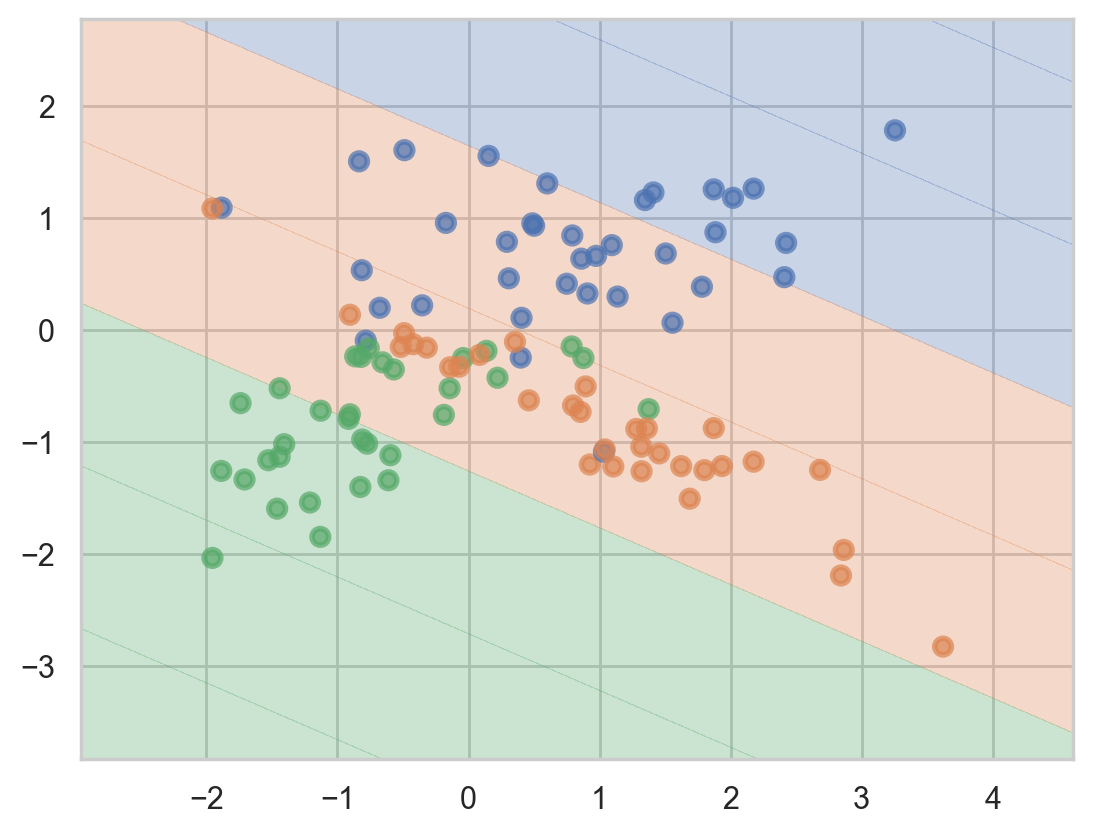

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Train accuracy is 1.0
Test accuracy is 0.7


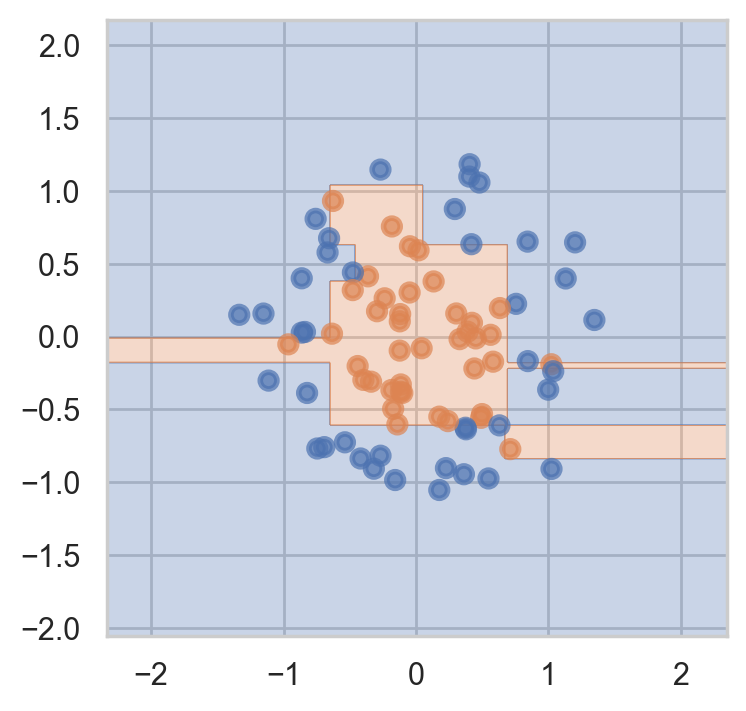

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
from sklearn.metrics import accuracy_score


fig = plt.figure(figsize=(4,4))
X_0, y_0 = datasets[0]
X_0_train, X_0_test, y_0_train, y_0_test = train_test_split(X_0, y_0, test_size=0.2, random_state=42, stratify=y_0)
clf.fit(X_0_train, y_0_train)
plot_surface(clf, X_0_train, y_0_train)
preds_0_train = clf.predict(X_0_train)
preds_0_test = clf.predict(X_0_test)
print(f'Train accuracy is {round(accuracy_score(y_0_train, preds_0_train),2)}')
print(f'Test accuracy is {round(accuracy_score(y_0_test, preds_0_test),2)}')

Train accuracy is 1.0
Test accuracy is 0.85


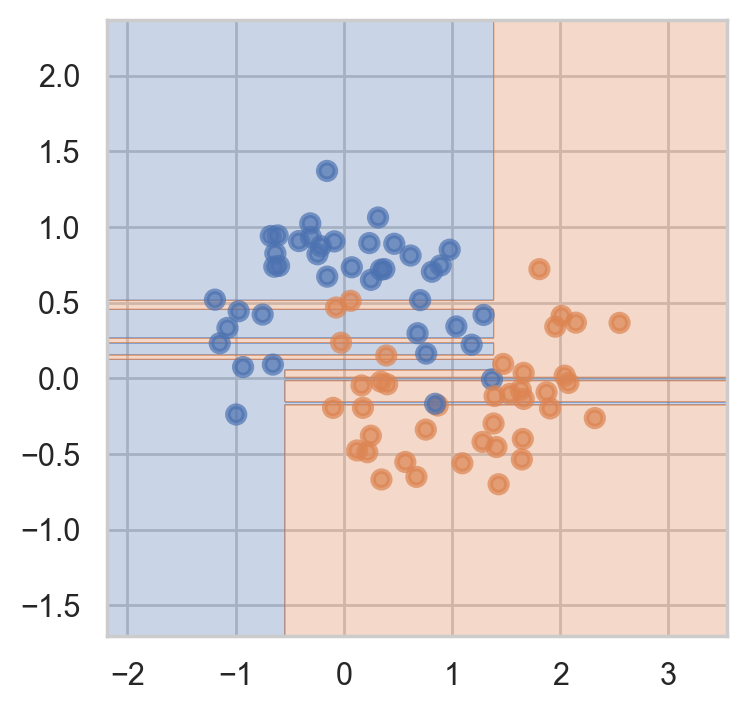

In [8]:
fig = plt.figure(figsize=(4,4))
X_1, y_1 = datasets[1]
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42, stratify=y_1)
clf.fit(X_1_train, y_1_train)
plot_surface(clf, X_1_train, y_1_train)
preds_1_train = clf.predict(X_1_train)
preds_1_test = clf.predict(X_1_test)
print(f'Train accuracy is {round(accuracy_score(y_1_train, preds_1_train),2)}')
print(f'Test accuracy is {round(accuracy_score(y_1_test, preds_1_test),2)}')

Train accuracy is 1.0
Test accuracy is 0.8


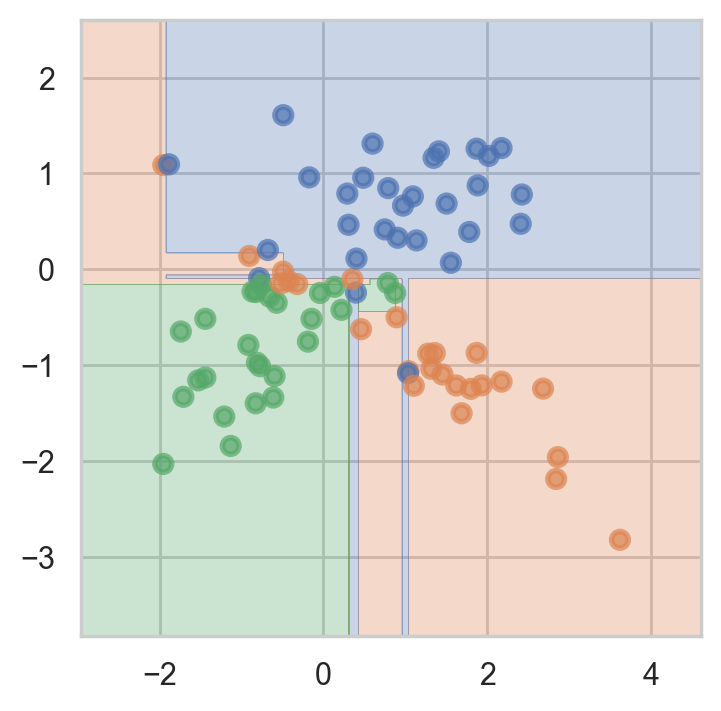

In [9]:
fig = plt.figure(figsize=(4,4))
X_2, y_2 = datasets[2]
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42, stratify=y_2)
clf.fit(X_2_train, y_2_train)
plot_surface(clf, X_2_train, y_2_train)
preds_2_train = clf.predict(X_2_train)
preds_2_test = clf.predict(X_2_test)
print(f'Train accuracy is {round(accuracy_score(y_2_train, preds_2_train),2)}')
print(f'Test accuracy is {round(accuracy_score(y_2_test, preds_2_test),2)}')

__Ответ:__

Как мы видим, деревья сильно переобучились. Accuracy на train множество составляет 1, при этом на test множестве модели показывают довольно плохой результат. Таким образом модели не выявили общих закономерностей в данных, а просто обучились под train выборку.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

у DecisionTreeClassifier есть много параметров
Предладгается запустить перебрать несколько из следующих параметров:
+ max_depth (The maximum depth of the tree)
+ min_samples_split (The minimum number of samples required to split an internal node)
+ min_samples_leaf (The minimum number of samples required to be at a leaf node)

##### max_depth=5, min_samples_leaf=5, min_samples_split=5

In [10]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5)

In [11]:
train_score_0 = []
test_score_0 = []

train_score_1 = []
test_score_1 = []

train_score_2 = []
test_score_2 = []

Train accuracy is 0.92
Test accuracy is 0.85


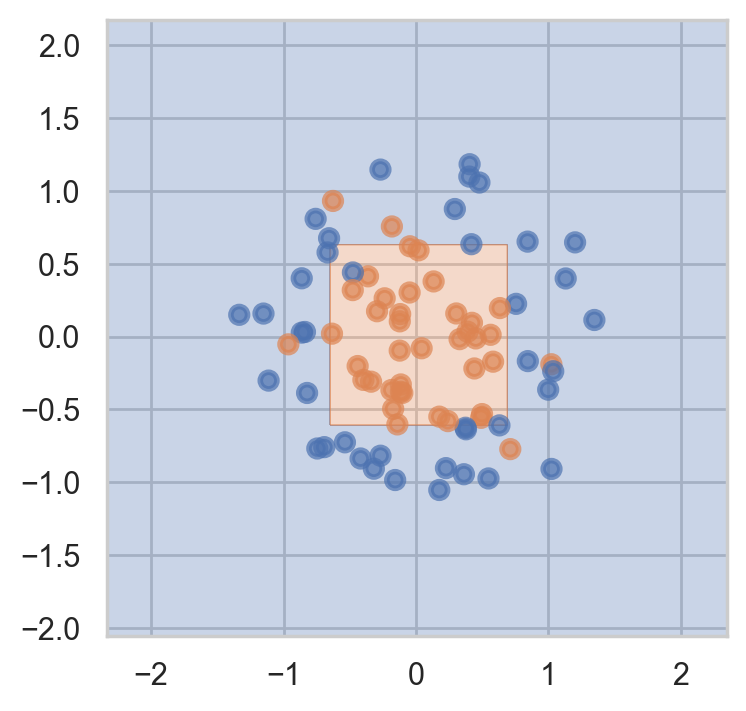

In [12]:
fig = plt.figure(figsize=(4,4))
X_0, y_0 = datasets[0]
X_0_train, X_0_test, y_0_train, y_0_test = train_test_split(X_0, y_0, test_size=0.2, random_state=42, stratify=y_0)
clf.fit(X_0_train, y_0_train)
plot_surface(clf, X_0_train, y_0_train)
preds_0_train = clf.predict(X_0_train)
preds_0_test = clf.predict(X_0_test)
print(f'Train accuracy is {round(accuracy_score(y_0_train, preds_0_train),2)}')
print(f'Test accuracy is {round(accuracy_score(y_0_test, preds_0_test),2)}') 
train_score_0.append(round(accuracy_score(y_0_train, preds_0_train),2))
test_score_0.append(round(accuracy_score(y_0_test, preds_0_test),2))

Train accuracy is 0.91
Test accuracy is 0.8


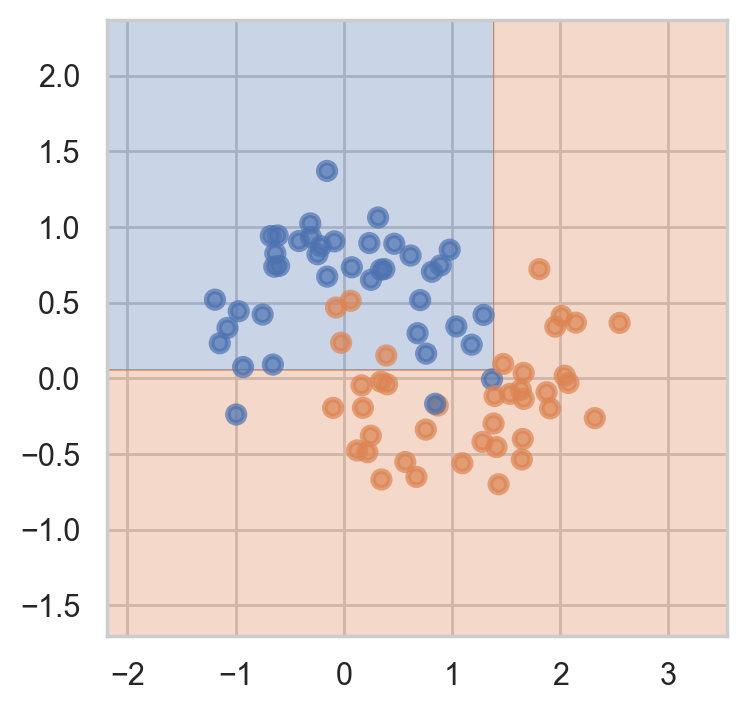

In [13]:
fig = plt.figure(figsize=(4,4))
X_1, y_1 = datasets[1]
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42, stratify=y_1)
clf.fit(X_1_train, y_1_train)
plot_surface(clf, X_1_train, y_1_train)
preds_1_train = clf.predict(X_1_train)
preds_1_test = clf.predict(X_1_test)
print(f'Train accuracy is {round(accuracy_score(y_1_train, preds_1_train),2)}')
print(f'Test accuracy is {round(accuracy_score(y_1_test, preds_1_test),2)}')
train_score_1.append(round(accuracy_score(y_1_train, preds_1_train),2))
test_score_1.append(round(accuracy_score(y_1_test, preds_1_test),2))

Train accuracy is 0.91
Test accuracy is 0.7


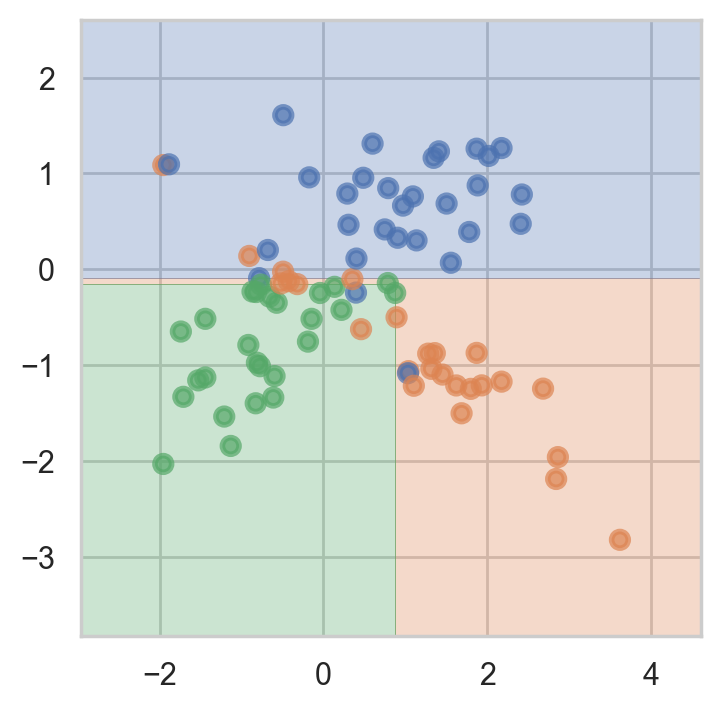

In [14]:
fig = plt.figure(figsize=(4,4))
X_2, y_2 = datasets[2]
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42, stratify=y_2)
clf.fit(X_2_train, y_2_train)
plot_surface(clf, X_2_train, y_2_train)
preds_2_train = clf.predict(X_2_train)
preds_2_test = clf.predict(X_2_test)
print(f'Train accuracy is {round(accuracy_score(y_2_train, preds_2_train),2)}')
print(f'Test accuracy is {round(accuracy_score(y_2_test, preds_2_test),2)}')
train_score_2.append(round(accuracy_score(y_2_train, preds_2_train),2))
test_score_2.append(round(accuracy_score(y_2_test, preds_2_test),2))

##### max_depth=10, min_samples_leaf=10, min_samples_split=10

In [15]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=10)

Train accuracy is 0.89
Test accuracy is 0.85


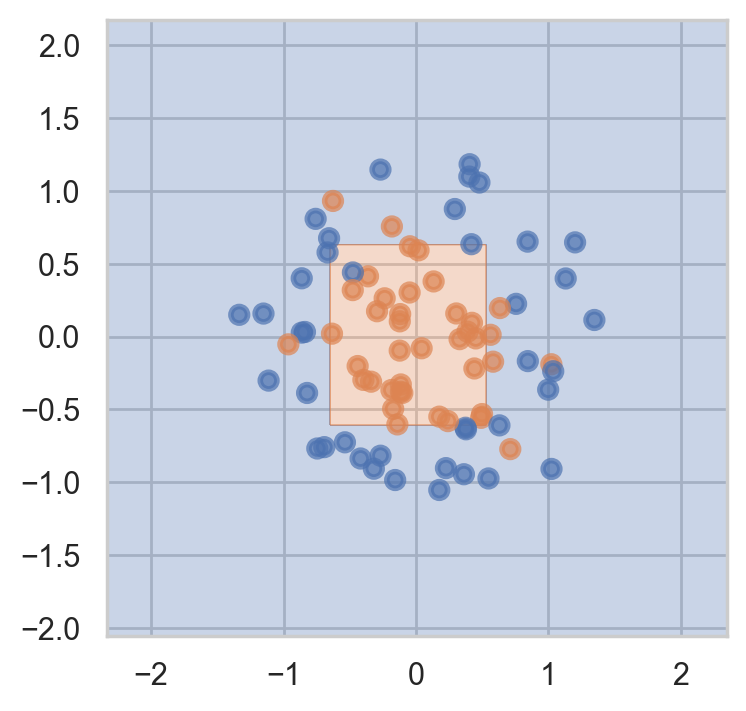

In [16]:
fig = plt.figure(figsize=(4,4))
X_0, y_0 = datasets[0]
X_0_train, X_0_test, y_0_train, y_0_test = train_test_split(X_0, y_0, test_size=0.2, random_state=42, stratify=y_0)
clf.fit(X_0_train, y_0_train)
plot_surface(clf, X_0_train, y_0_train)
preds_0_train = clf.predict(X_0_train)
preds_0_test = clf.predict(X_0_test)
print(f'Train accuracy is {round(accuracy_score(y_0_train, preds_0_train),2)}')
print(f'Test accuracy is {round(accuracy_score(y_0_test, preds_0_test),2)}')
train_score_0.append(round(accuracy_score(y_0_train, preds_0_train),2))
test_score_0.append(round(accuracy_score(y_0_test, preds_0_test),2))

Train accuracy is 0.86
Test accuracy is 0.7


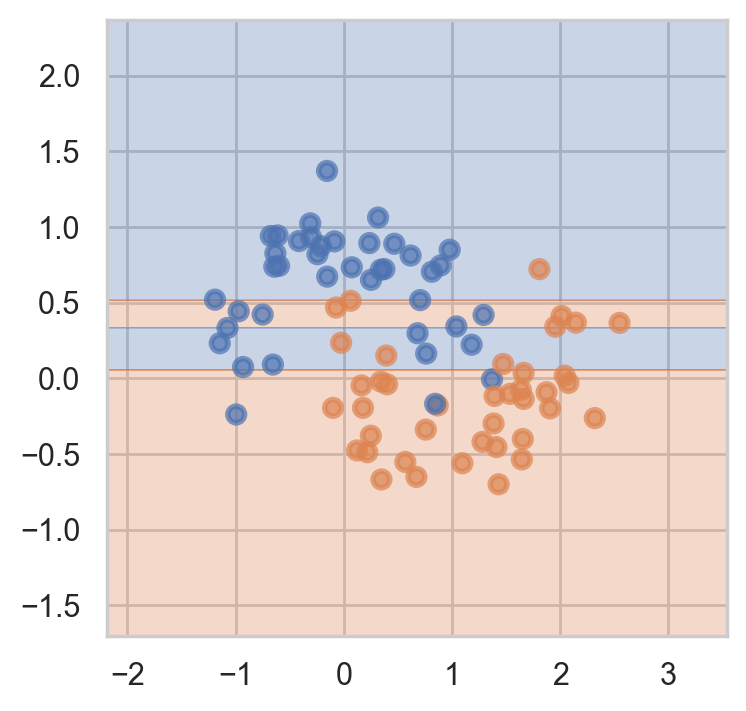

In [17]:
fig = plt.figure(figsize=(4,4))
X_1, y_1 = datasets[1]
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42, stratify=y_1)
clf.fit(X_1_train, y_1_train)
plot_surface(clf, X_1_train, y_1_train)
preds_1_train = clf.predict(X_1_train)
preds_1_test = clf.predict(X_1_test)
print(f'Train accuracy is {round(accuracy_score(y_1_train, preds_1_train),2)}')
print(f'Test accuracy is {round(accuracy_score(y_1_test, preds_1_test),2)}')
train_score_1.append(round(accuracy_score(y_1_train, preds_1_train),2))
test_score_1.append(round(accuracy_score(y_1_test, preds_1_test),2))

Train accuracy is 0.88
Test accuracy is 0.7


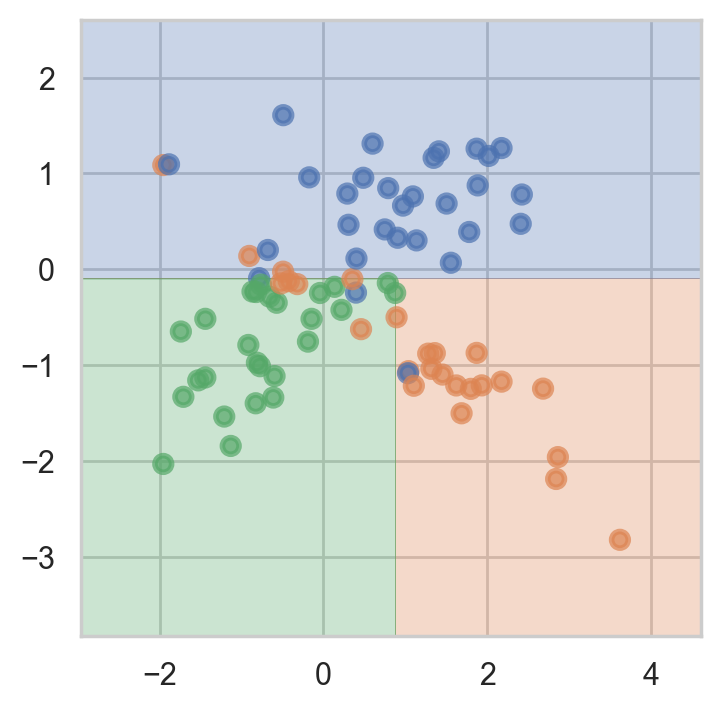

In [18]:
fig = plt.figure(figsize=(4,4))
X_2, y_2 = datasets[2]
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42, stratify=y_2)
clf.fit(X_2_train, y_2_train)
plot_surface(clf, X_2_train, y_2_train)
preds_2_train = clf.predict(X_2_train)
preds_2_test = clf.predict(X_2_test)
print(f'Train accuracy is {round(accuracy_score(y_2_train, preds_2_train),2)}')
print(f'Test accuracy is {round(accuracy_score(y_2_test, preds_2_test),2)}')
train_score_2.append(round(accuracy_score(y_2_train, preds_2_train),2))
test_score_2.append(round(accuracy_score(y_2_test, preds_2_test),2))

##### max_depth=20, min_samples_leaf=20, min_samples_split=20

In [19]:
clf = DecisionTreeClassifier(max_depth=20, min_samples_leaf=20, min_samples_split=20)

Train accuracy is 0.7
Test accuracy is 0.45


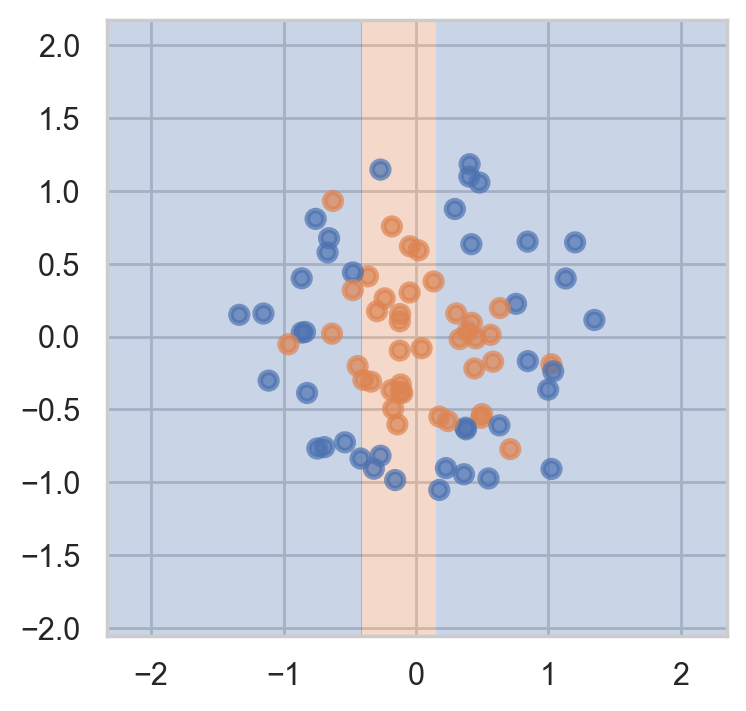

In [20]:
fig = plt.figure(figsize=(4,4))
X_0, y_0 = datasets[0]
X_0_train, X_0_test, y_0_train, y_0_test = train_test_split(X_0, y_0, test_size=0.2, random_state=42, stratify=y_0)
clf.fit(X_0_train, y_0_train)
plot_surface(clf, X_0_train, y_0_train)
preds_0_train = clf.predict(X_0_train)
preds_0_test = clf.predict(X_0_test)
print(f'Train accuracy is {round(accuracy_score(y_0_train, preds_0_train),2)}')
print(f'Test accuracy is {round(accuracy_score(y_0_test, preds_0_test),2)}')
train_score_0.append(round(accuracy_score(y_0_train, preds_0_train),2))
test_score_0.append(round(accuracy_score(y_0_test, preds_0_test),2))

Train accuracy is 0.84
Test accuracy is 0.8


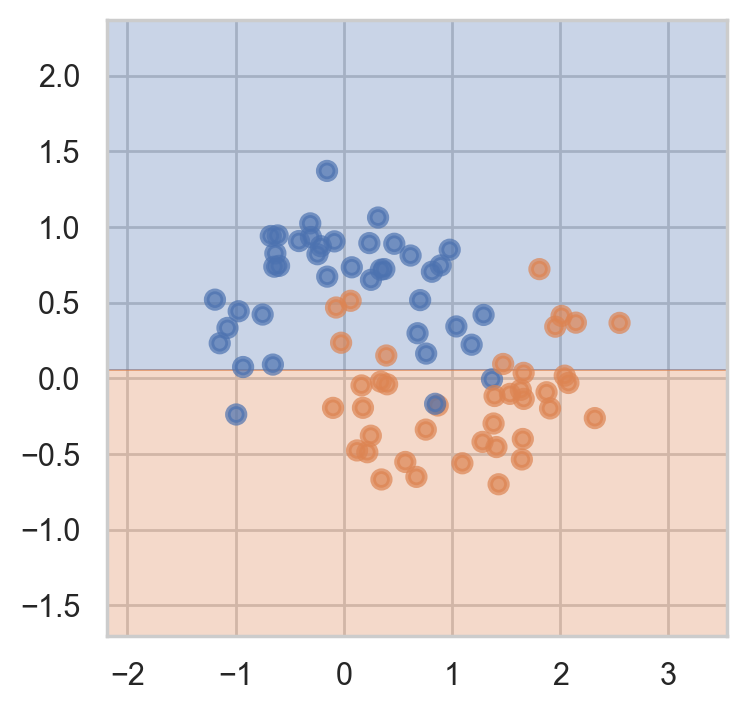

In [21]:
fig = plt.figure(figsize=(4,4))
X_1, y_1 = datasets[1]
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42, stratify=y_1)
clf.fit(X_1_train, y_1_train)
plot_surface(clf, X_1_train, y_1_train)
preds_1_train = clf.predict(X_1_train)
preds_1_test = clf.predict(X_1_test)
print(f'Train accuracy is {round(accuracy_score(y_1_train, preds_1_train),2)}')
print(f'Test accuracy is {round(accuracy_score(y_1_test, preds_1_test),2)}')
train_score_1.append(round(accuracy_score(y_1_train, preds_1_train),2))
test_score_1.append(round(accuracy_score(y_1_test, preds_1_test),2))

Train accuracy is 0.88
Test accuracy is 0.8


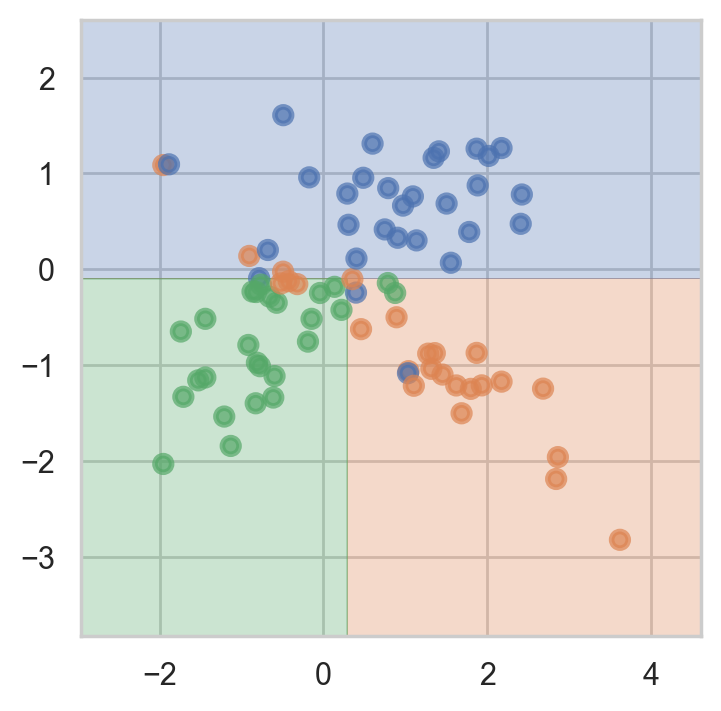

In [22]:
fig = plt.figure(figsize=(4,4))
X_2, y_2 = datasets[2]
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42, stratify=y_2)
clf.fit(X_2_train, y_2_train)
plot_surface(clf, X_2_train, y_2_train)
preds_2_train = clf.predict(X_2_train)
preds_2_test = clf.predict(X_2_test)
print(f'Train accuracy is {round(accuracy_score(y_2_train, preds_2_train),2)}')
print(f'Test accuracy is {round(accuracy_score(y_2_test, preds_2_test),2)}')
train_score_2.append(round(accuracy_score(y_2_train, preds_2_train),2))
test_score_2.append(round(accuracy_score(y_2_test, preds_2_test),2))

Давайте посмотрим, как менялись train и test score дерева на трех датасетах по мере увеличения свободы

Text(0, 0.5, 'Score')

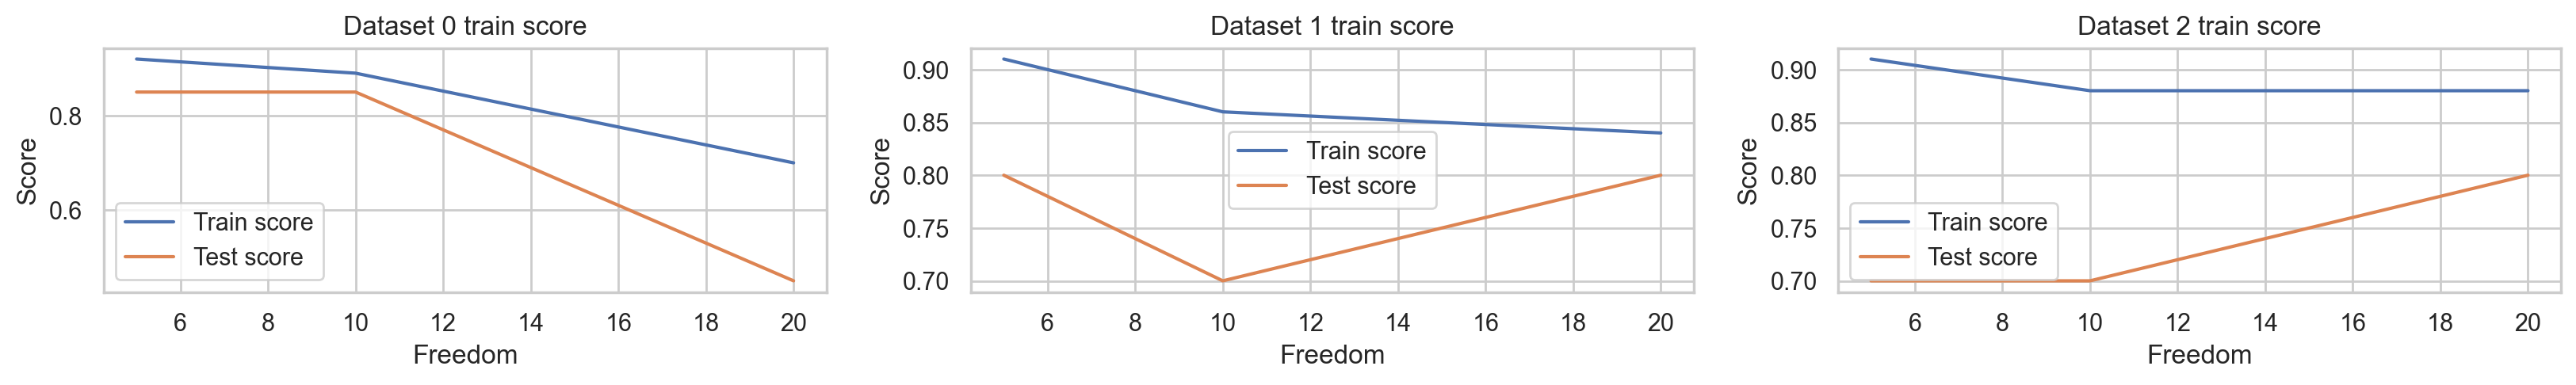

In [23]:
fig, ax = plt.subplots(1,3, figsize=(20,2))

sns.lineplot(x=[5,10, 20], y=train_score_0, label='Train score', ax=ax[0])
sns.lineplot(x=[5,10, 20], y=test_score_0, label='Test score', ax=ax[0])
ax[0].set_title('Dataset 0 train score')
ax[0].set_xlabel('Freedom')
ax[0].set_ylabel('Score')

sns.lineplot(x=[5,10, 20], y=train_score_1, label='Train score', ax=ax[1])
sns.lineplot(x=[5,10, 20], y=test_score_1, label='Test score', ax=ax[1])
ax[1].set_title('Dataset 1 train score')
ax[1].set_xlabel('Freedom')
ax[1].set_ylabel('Score')

sns.lineplot(x=[5,10, 20], y=train_score_2, label='Train score', ax=ax[2])
sns.lineplot(x=[5,10, 20], y=test_score_2, label='Test score', ax=ax[2])
ax[2].set_title('Dataset 2 train score')
ax[2].set_xlabel('Freedom')
ax[2].set_ylabel('Score')

__Ответ:__

* Как видим, c увеличением свободы для первого датасета падает как train так и test score
* Для второго датасета с увеличением свободы train score падает, а движение test score немонотонно
* Для третьего датасета test score растет с увеличением свободы. Train score при этом падает

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (2 балла)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (1 балл)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2021-fall/homeworks-practice/homework-practice-05-trees/students.csv')

In [25]:
from hw5code import find_best_split

features = df.drop(columns='UNS')
target = df['UNS']

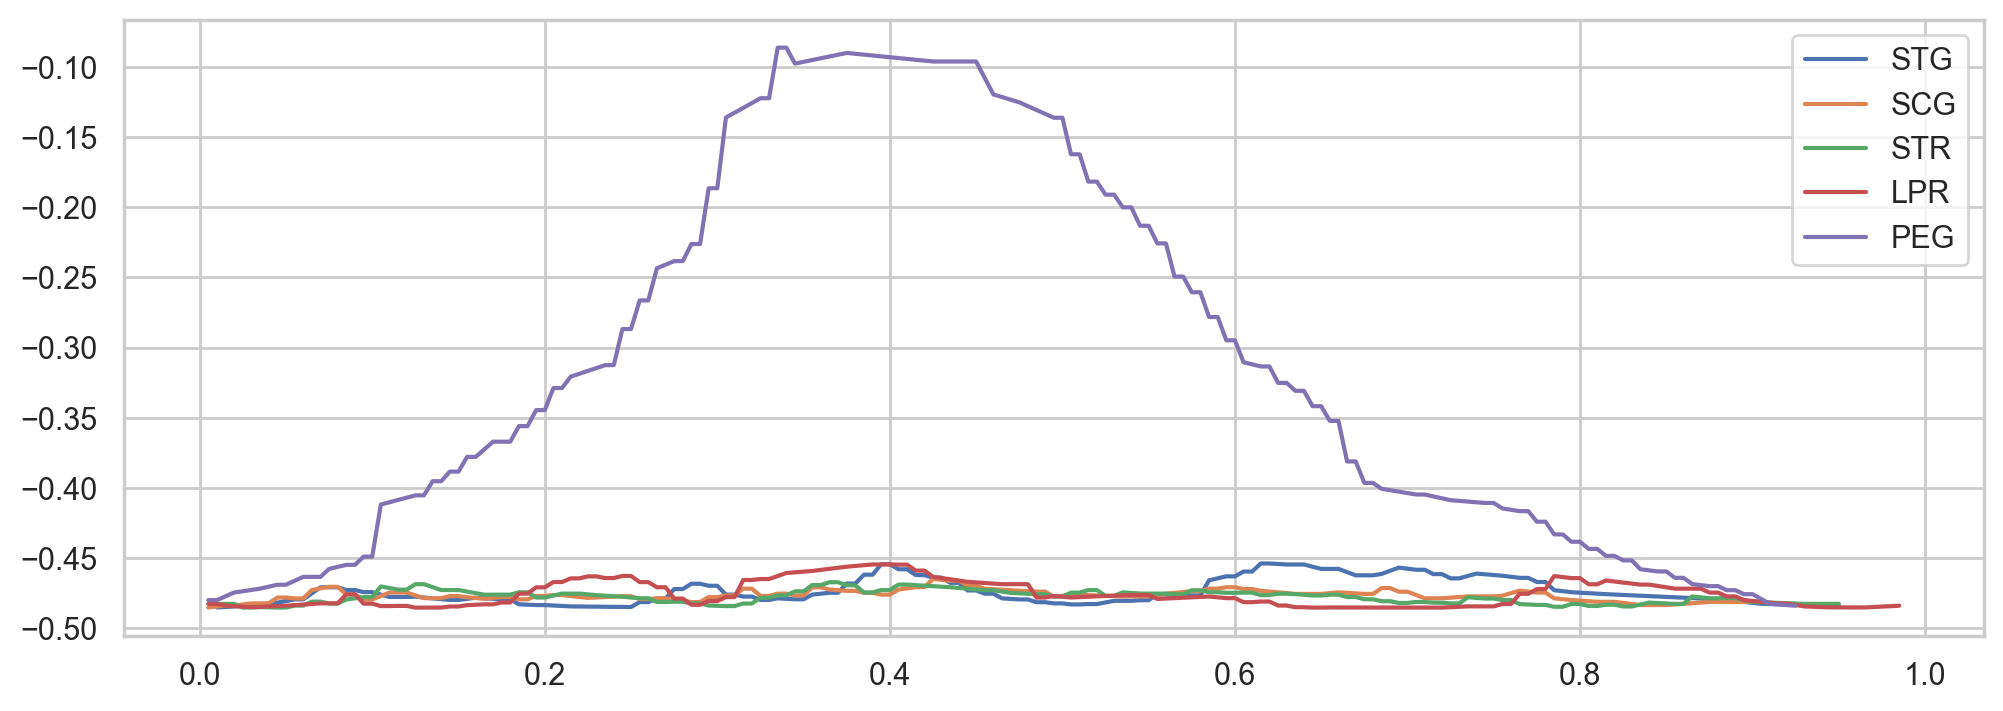

In [26]:
fig, ax = plt.subplots(figsize=(12,4))

for column_name in features.columns:
    thr, gini, thr_best, gini_best = find_best_split(features[column_name].values, target.values)
    plt.plot(thr, gini, label=column_name)
plt.legend();

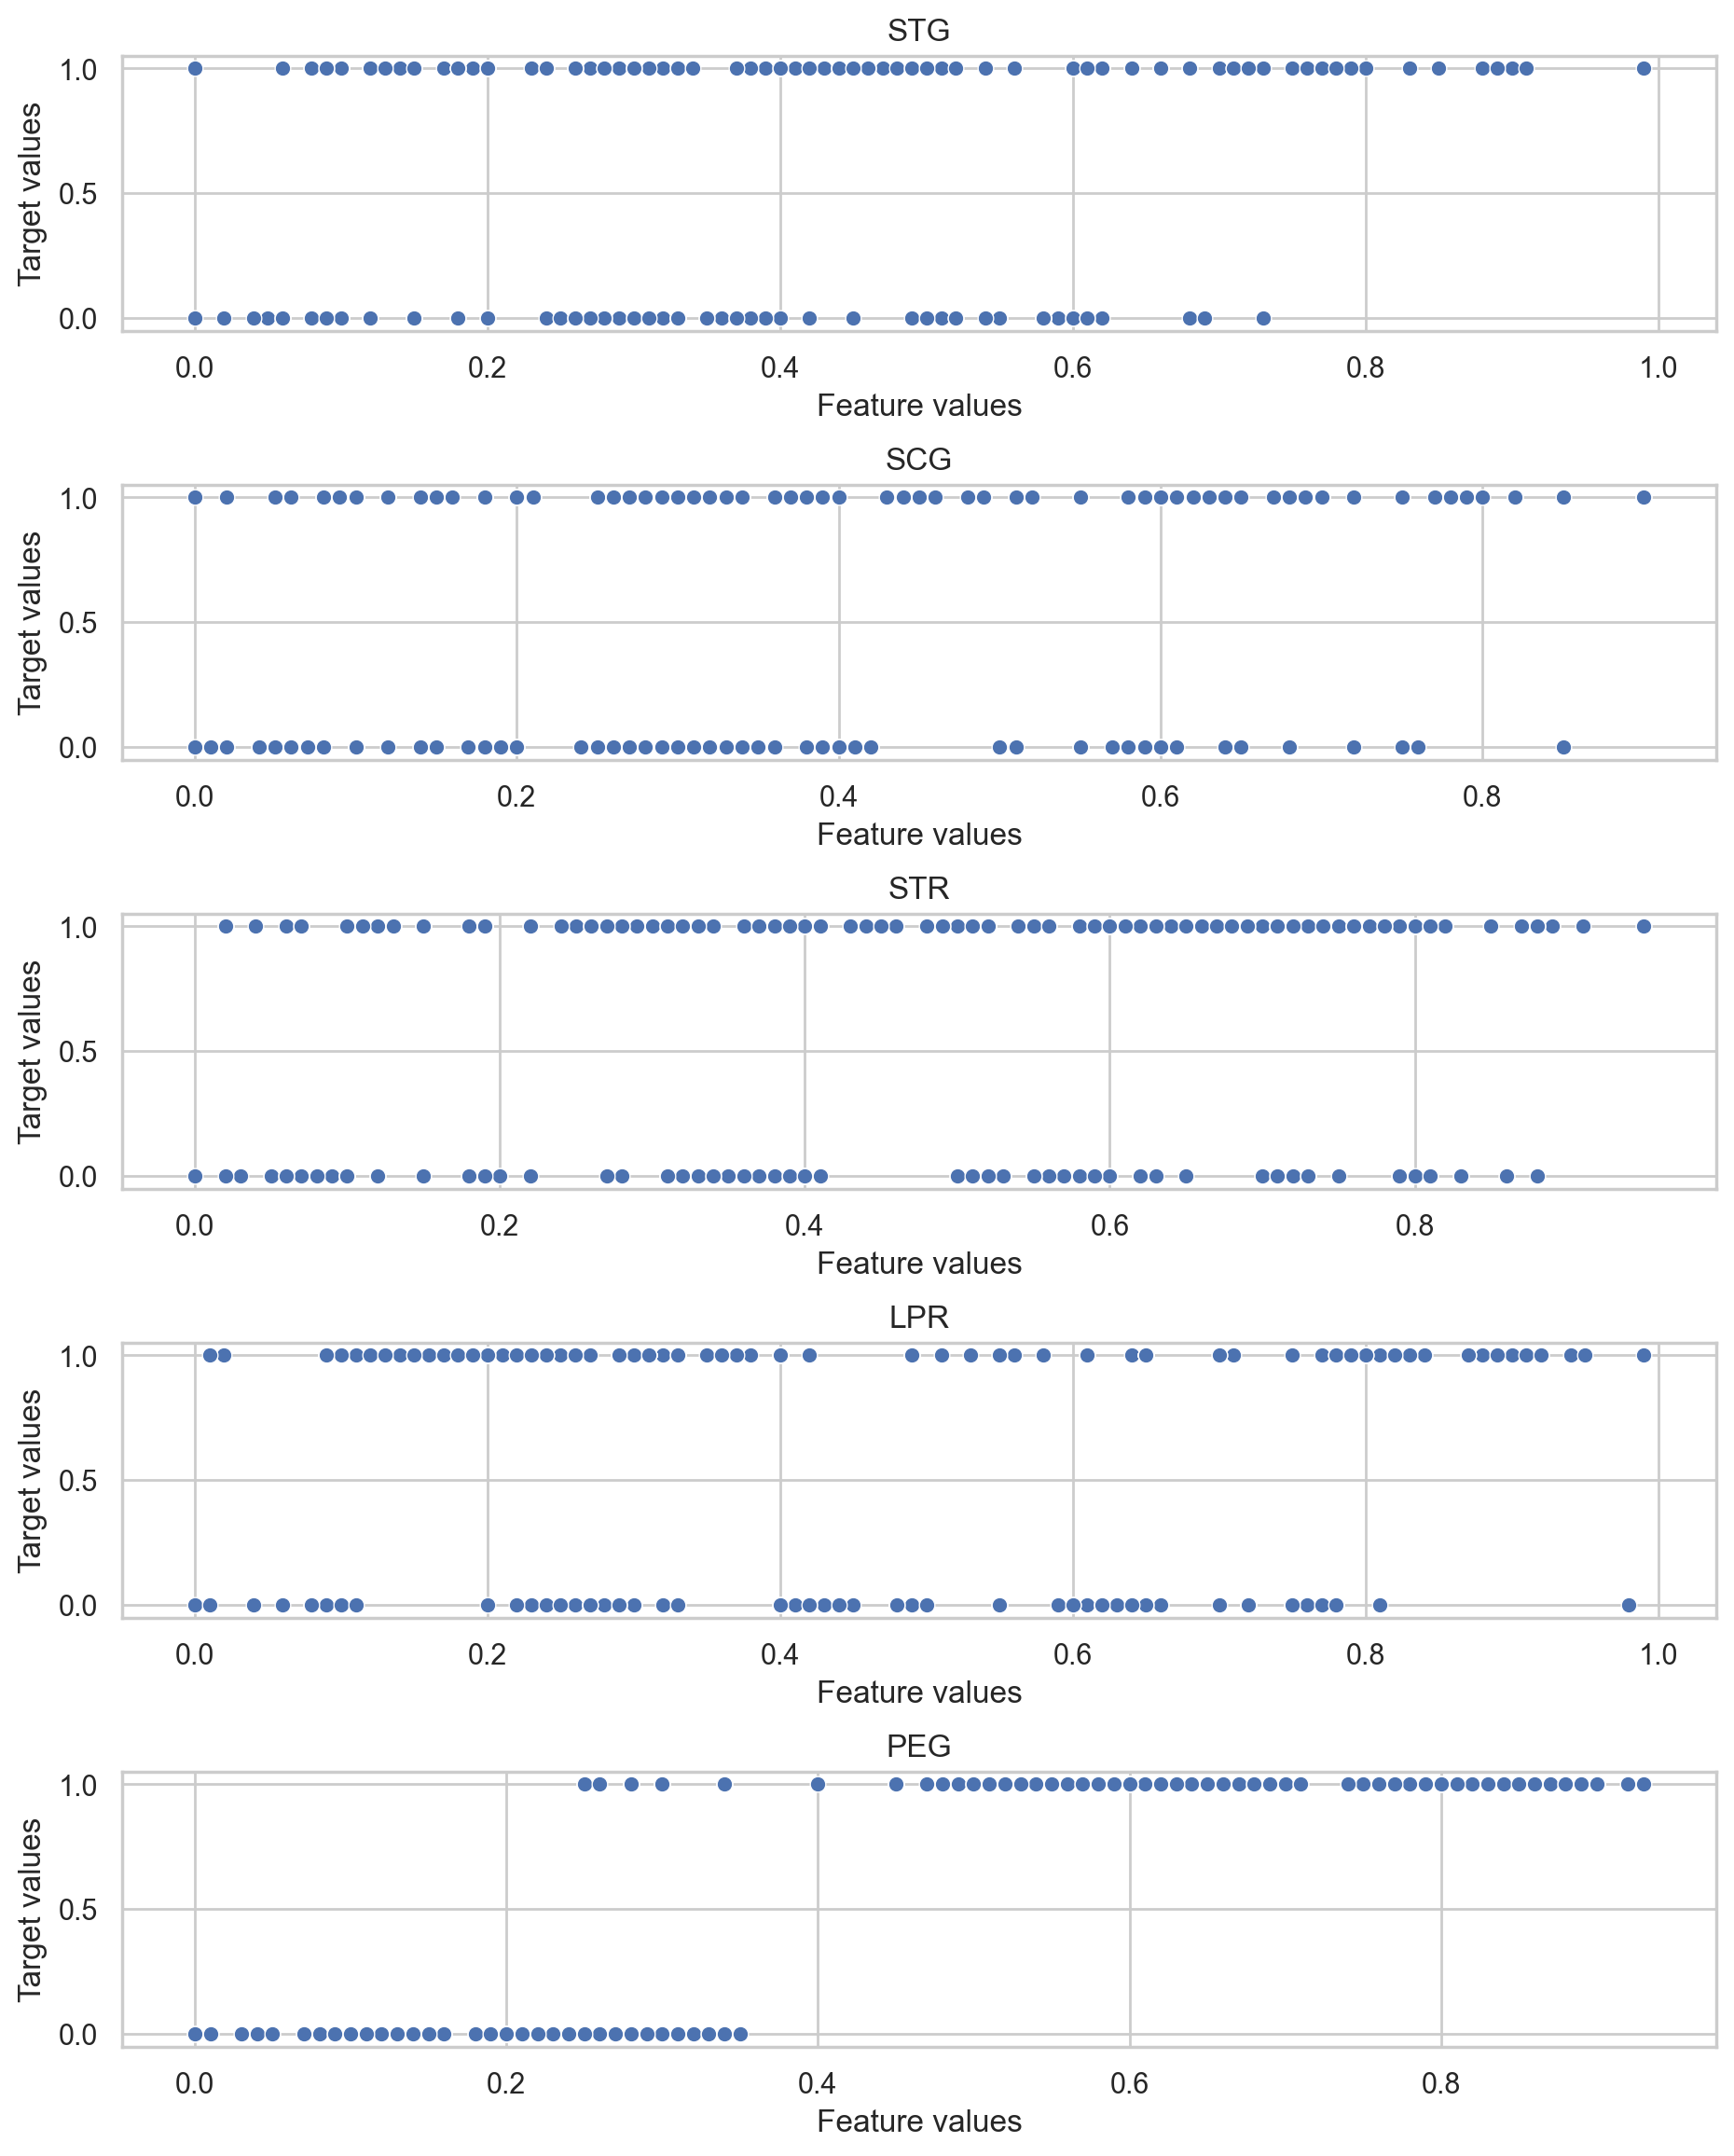

In [27]:
fig, ax = plt.subplots(5,1 ,figsize=(10,12))

fig.tight_layout(pad=3)


for i, column_name in enumerate(features.columns):
    sns.scatterplot(x=features[column_name], y=target, ax=ax[i])
    ax[i].set_title(f'{column_name}')
    ax[i].set_xlabel('Feature values')
    ax[i].set_ylabel('Target values')


__Задание 5. (1 балл)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

Судя по графикам, деление нужно производить по признаку PEG. Этот результат хорошо согласуется с визуальной оценкой scatter-графиков, так как на scatter-графике для четвертого признака, высокие значения признака в основном соотвествуют значению 1 целевой переменной, а низкие значения признака - значению 0 целевой переменной. Для хороших признаков график будет выглядеть как для признака PEG (низкий по краям и поднимается к середние). Для плохих признаков кривая все время лежит в области низких значений. Что эти признаки плохие видно и на scatter plot.

__Задание 6. (2 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

Done

__Задание 7. (1 балл)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [28]:
df = pd.read_csv('./agaricus-lepiota.data')

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from hw5code import DecisionTree
from sklearn.metrics import accuracy_score

In [30]:
for column_name in df.columns:
    le = LabelEncoder()
    df.loc[:, column_name] = le.fit_transform(df.loc[:, column_name])

In [31]:
target = df['p']
features = df.drop(columns='p')
X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, test_size=0.5, random_state=42)

In [32]:
feature_types = ['categorical' for x in X_train]

In [33]:
dt = DecisionTree(feature_types)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred_train = dt.predict(X_train)

In [34]:
print('Train accuracy:', accuracy_score(y_train, y_pred_train))
print('Test accuracy:', accuracy_score(y_test, y_pred))
print('Depth:', dt.depth)

Train accuracy: 1.0
Test accuracy: 1.0
Depth: 10


__Задание 8. (бонус, 2 балла)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце).

In [35]:
df = pd.read_csv('./tic-tac-toe.data')
df.head()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive


In [36]:
for column_name in df.columns:
    le = LabelEncoder()
    df.loc[:, column_name] = le.fit_transform(df.loc[:, column_name])

In [37]:
target = df['positive']
features = df.drop(columns='positive')
X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, test_size=0.5, random_state=42)

In [38]:
feature_types = ['categorical' for x in X_train]

In [39]:
dt = DecisionTree(feature_types, max_depth=15, min_samples_leaf=5, min_samples_split=5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred_train = dt.predict(X_train)

In [40]:
print('Train accuracy:', accuracy_score(y_train, y_pred_train))
print('Test accuracy:', accuracy_score(y_test, y_pred))
print('Depth:', dt.depth)

Train accuracy: 0.7656903765690377
Test accuracy: 0.8079331941544885
Depth: 16


In [41]:
depth = [1,5,20,30,50]
min_samples_leaf = [1,5,10,15,20]
min_samples_split = [1,5,10,15,20]

Text(0, 0.5, 'Accuracy')

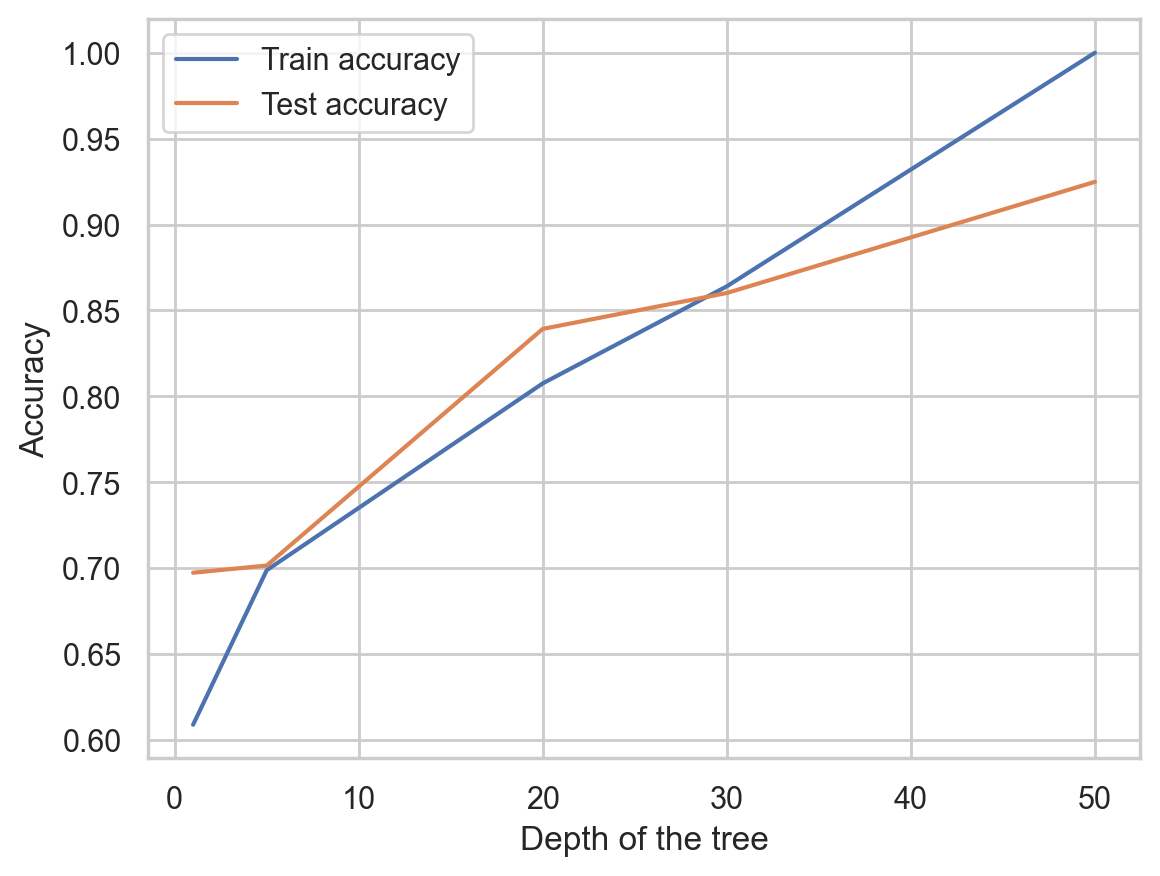

In [42]:
depth_accuracy_train = []
depth_accuracy_test = []

for i in depth:
    dt = DecisionTree(feature_types, max_depth=i)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    y_pred_train = dt.predict(X_train)
    depth_accuracy_train.append(accuracy_score(y_train, y_pred_train))
    depth_accuracy_test.append(accuracy_score(y_test, y_pred))

fig, ax = plt.subplots()

sns.lineplot(x=depth, y=depth_accuracy_train, ax=ax, label='Train accuracy')
sns.lineplot(x=depth, y=depth_accuracy_test, ax=ax, label='Test accuracy')
ax.set_xlabel('Depth of the tree')
ax.set_ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

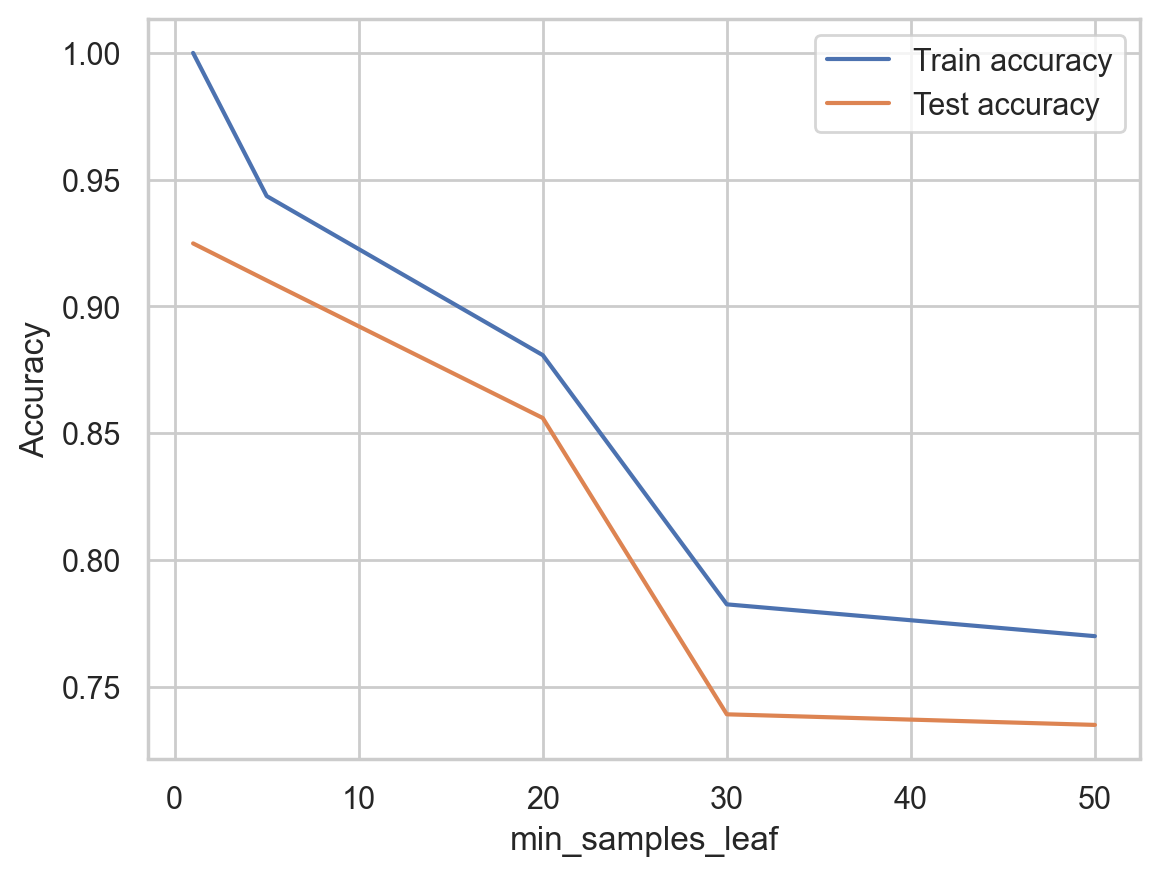

In [43]:
leaf_accuracy_train = []
leaf_accuracy_test = []

for i in min_samples_leaf:
    dt = DecisionTree(feature_types, min_samples_leaf=i)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    y_pred_train = dt.predict(X_train)
    leaf_accuracy_train.append(accuracy_score(y_train, y_pred_train))
    leaf_accuracy_test.append(accuracy_score(y_test, y_pred))

fig, ax = plt.subplots()

sns.lineplot(x=depth, y=leaf_accuracy_train, ax=ax, label='Train accuracy')
sns.lineplot(x=depth, y=leaf_accuracy_test, ax=ax, label='Test accuracy')
ax.set_xlabel('min_samples_leaf')
ax.set_ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

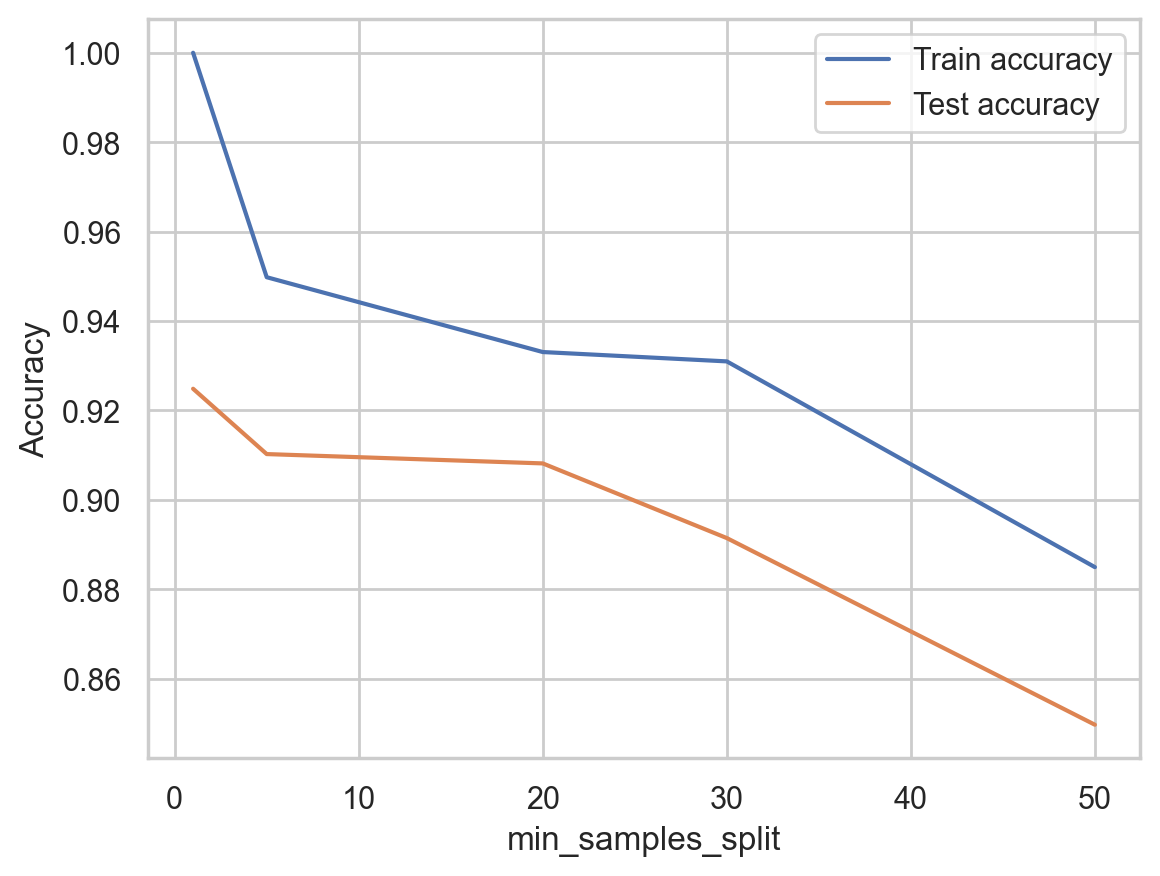

In [44]:
split_accuracy_train = []
split_accuracy_test = []

for i in min_samples_split:
    dt = DecisionTree(feature_types, min_samples_split=i)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    y_pred_train = dt.predict(X_train)
    split_accuracy_train.append(accuracy_score(y_train, y_pred_train))
    split_accuracy_test.append(accuracy_score(y_test, y_pred))

fig, ax = plt.subplots()

sns.lineplot(x=depth, y=split_accuracy_train, ax=ax, label='Train accuracy')
sns.lineplot(x=depth, y=split_accuracy_test, ax=ax, label='Test accuracy')
ax.set_xlabel('min_samples_split')
ax.set_ylabel('Accuracy')

Вставьте что угодно, описывающее ваши впечатления от этого задания:

![123](https://i.kym-cdn.com/entries/icons/mobile/000/026/489/crying.jpg)